In [1]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 14

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics 
from IPython.display import Image



# DATA CLEANSING AND ANALYSIS


In [3]:
df = pd.read_csv('train.csv', )
df.head()

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369920 entries, 0 to 369919
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   post_id    369920 non-null  int64  
 1   user_id    369920 non-null  int64  
 2   country    369920 non-null  int64  
 3   category   369920 non-null  object 
 4   #views     369885 non-null  float64
 5   #comments  359309 non-null  float64
 6   #likes     369920 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 19.8+ MB


In [ ]:
df.describe()

,post_id,user_id,country,#views,#comments,#likes
count,369920.000000,369920.000000,369920.000000,3.698850e+05,3.593090e+05,3.699200e+05
mean,264102.305696,21056.832826,6.700938,5.001114e+05,2.003481e+03,2.310587e+04
std,152590.609962,12101.006391,4.424512,1.623025e+06,1.209824e+04,8.616847e+04
min,0.000000,0.000000,0.000000,6.113000e+03,0.000000e+00,1.000000e+00
25%,131912.750000,10552.000000,3.000000,6.136600e+04,2.110000e+02,2.641000e+03
50%,264087.000000,21224.000000,6.000000,1.571650e+05,5.730000e+02,7.012000e+03
75%,396315.250000,31537.000000,11.000000,4.239210e+05,1.523000e+03,1.928500e+04
max,528460.000000,41773.000000,14.000000,1.779872e+08,1.219455e+06,6.197312e+06


In [ ]:
df.isnull().sum()

post_id          0
user_id          0
country          0
category         0
#views          35
#comments    10611
#likes           0
dtype: int64

In [ ]:
# drop the missing values
df.dropna(inplace= True)

In [ ]:
df.drop_duplicates()

,post_id,user_id,country,category,#views,#comments,#likes
0,141569,13588,13,gaming,2403572.0,5606.0,107865
1,278047,5601,13,gaming,1421234.0,7316.0,68570
2,278280,31823,13,gaming,1460690.0,9924.0,136786
3,161305,14424,13,gaming,1463710.0,1087.0,62590
4,340945,8532,13,gaming,2507066.0,2974.0,21325
...,...,...,...,...,...,...,...
369915,440673,6987,1,technology,45459.0,1293.0,3713
369916,224015,15618,1,technology,313055.0,2500.0,21075
369917,170246,5816,1,technology,1545014.0,1680.0,98914
369918,504682,40790,1,technology,244363.0,1669.0,11886


In [ ]:
df.shape

(359274, 7)

In [ ]:
df.set_index('post_id', inplace= True)


In [ ]:
df

,user_id,country,category,#views,#comments,#likes
post_id,,,,,,
141569,13588,13,gaming,2403572.0,5606.0,107865
278047,5601,13,gaming,1421234.0,7316.0,68570
278280,31823,13,gaming,1460690.0,9924.0,136786
161305,14424,13,gaming,1463710.0,1087.0,62590
340945,8532,13,gaming,2507066.0,2974.0,21325
...,...,...,...,...,...,...
440673,6987,1,technology,45459.0,1293.0,3713
224015,15618,1,technology,313055.0,2500.0,21075
170246,5816,1,technology,1545014.0,1680.0,98914


In [ ]:
# Convert strings to numbers
df.dtypes

user_id        int64
country        int64
category      object
#views       float64
#comments    float64
#likes         int64
dtype: object

In [ ]:
df.columns

Index(['user_id', 'country', 'category', '#views', '#comments', '#likes'], dtype='object')

In [ ]:
df.category.unique()

array(['gaming', 'sports', 'entertainment', 'automotive', 'music',
       'animals', 'comedy', 'howTo', 'technology'], dtype=object)

# Visualizing and Examining Data


[None, None, None, None, None, None]

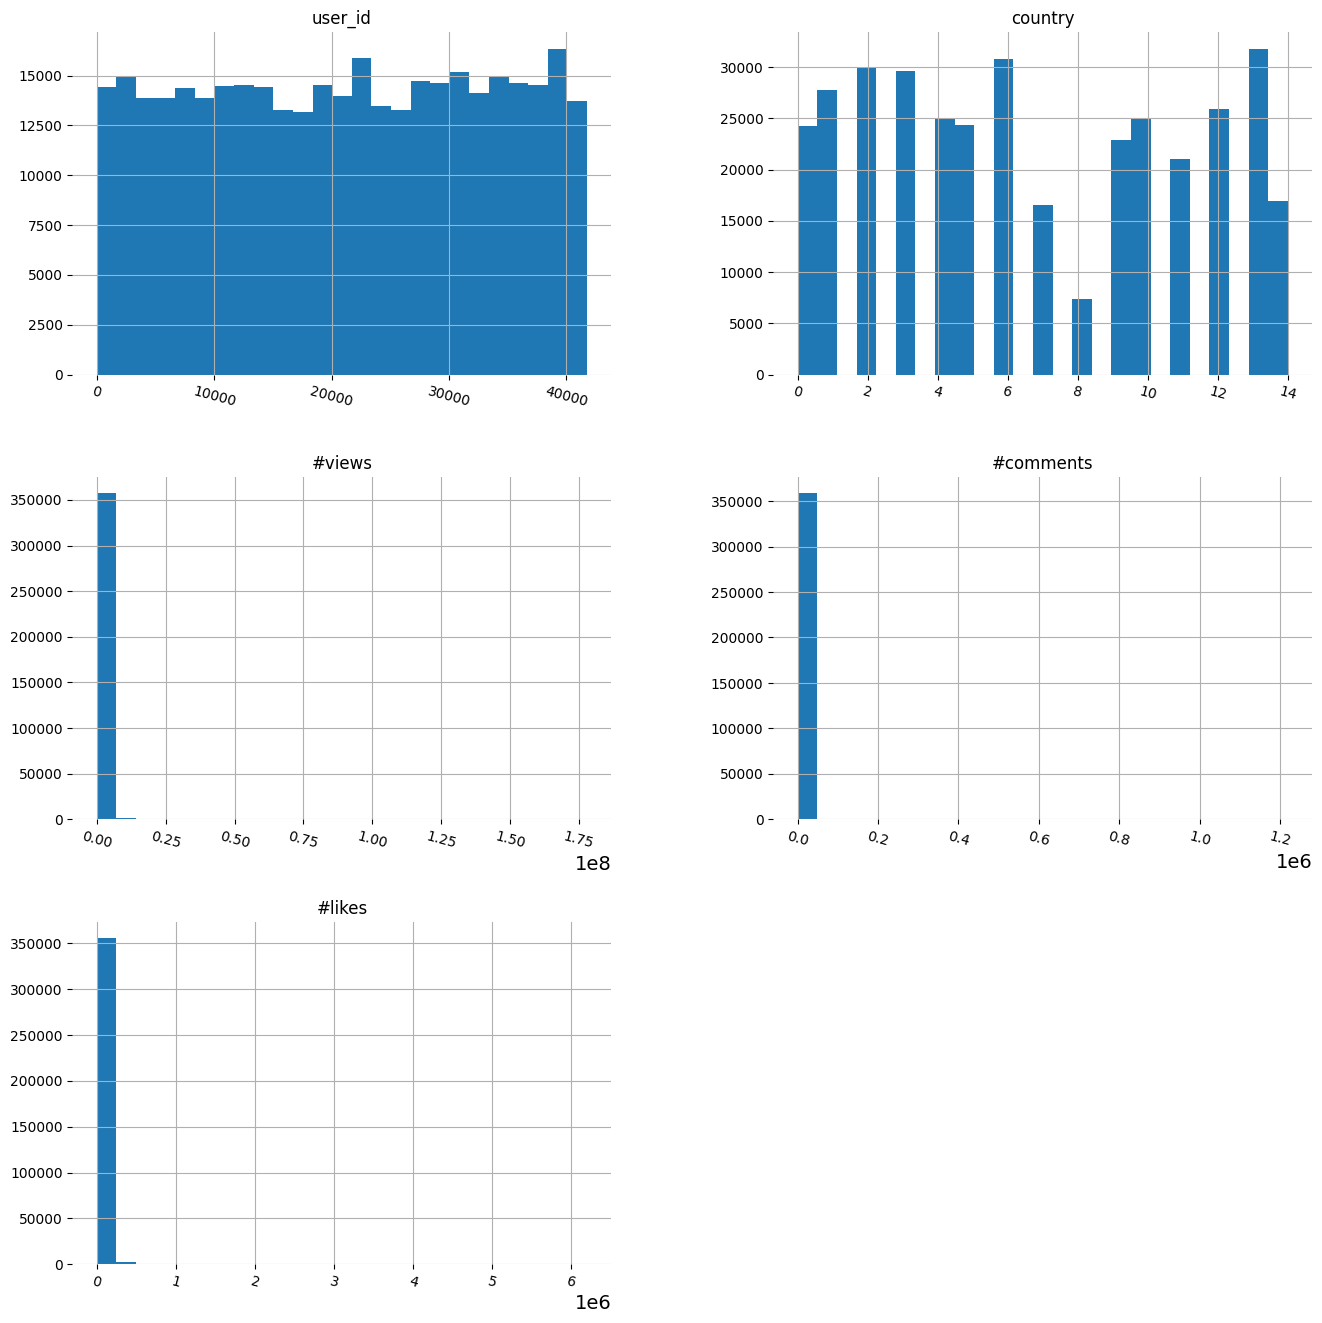

In [ ]:
# A histogram of data

test=df[['user_id', 'country', 'category', '#views', '#comments', '#likes']]
h = test.hist(bins=25,figsize=(16,16), xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()]
[x.yaxis.tick_left() for x in h.ravel()]

In [ ]:
df.columns

Index(['user_id', 'country', 'category', '#views', '#comments', '#likes'], dtype='object')

In [ ]:
# pairplot

sns.pairplot(df[['user_id', 'country', 'category', '#views', '#comments', '#likes']], hue='category', palette='afmhot',size=4)

c:\Users\MSHOME\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


From the pairplots, we seem to get the classical linear distribution of the data points, for example with price against sqft_living. This bodes well as in the latter analysis, we will implement some linear models which we will use in our Feature ranking. Let's look at the correlation heatmap:

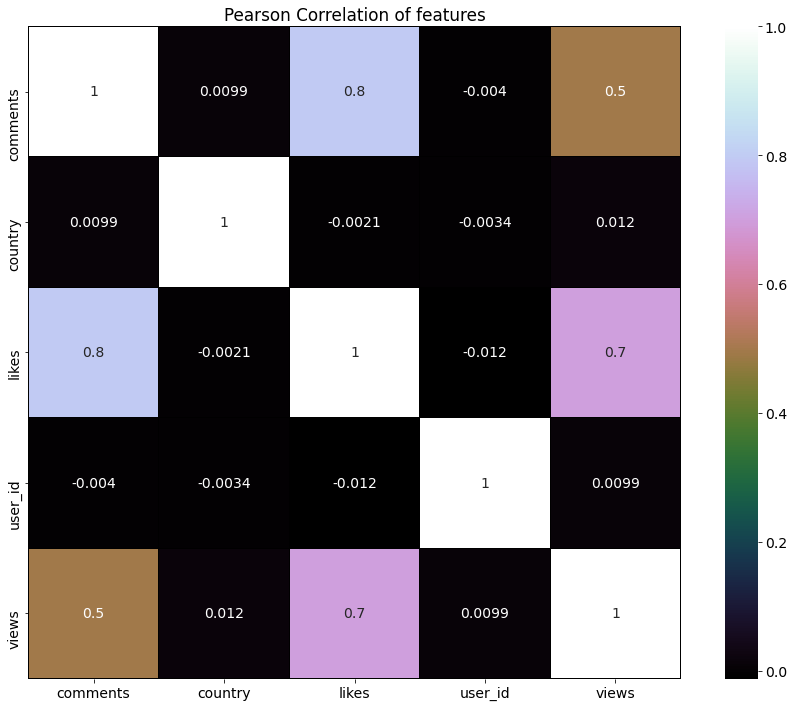

In [ ]:
# Pearson Correlation of features

str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [ ]:
df.dtypes

user_id       int64
country       int64
category     object
views       float64
comments    float64
likes         int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# type transform
df.category = le.fit_transform(df.category)


# Feature Importance

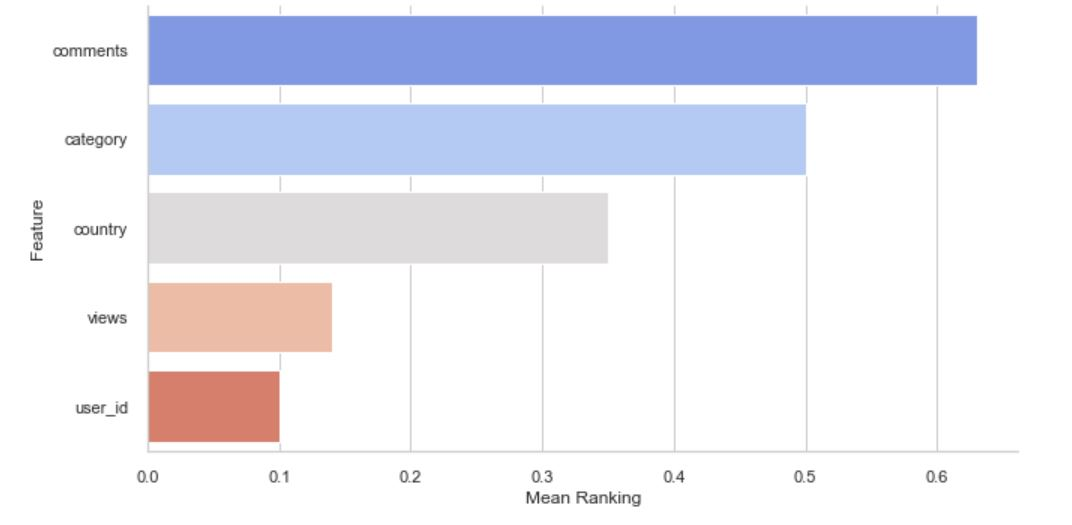

In [ ]:
Image( "Feature Importance.jpg", width=1600, height=1600)


# Machine Learning Modeling

In [ ]:
# Extract the input variable and target variable
X = df[['user_id', 'country', 'category', 'views', 'comments']]   

y = df['likes']

In [ ]:
# split original data [i.e X and y] into 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

print("Root Mean Square Error is:", round(metrics.r2_score(y_test, y_test_pred)*100,2), '%')


Root Mean Square Error is: 93.97 %


In [ ]:
y_test[0:10]

post_id
409316      681
27307       137
153911    33395
101333     6858
62107     11677
305919     1588
12235      3924
473232      715
149469     1513
527560      134
Name: likes, dtype: int64

In [ ]:
y_test_pred[0:10]

array([  387.,   137., 40155.,  6866.,  3793.,  4094.,  3927.,  1432.,
        5989.,  1144.])

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 101, n_jobs= -1, random_state = 41 )
rf.fit(X_train, y_train)
y_test_pred = rf.predict(X_test)

print("Root Mean Square Error is:", round(metrics.r2_score(y_test, y_test_pred)*100,2), '%')


Root Mean Square Error is: 96.73 %


In [ ]:
y_test[0:10]

post_id
409316      681
27307       137
153911    33395
101333     6858
62107     11677
305919     1588
12235      3924
473232      715
149469     1513
527560      134
Name: likes, dtype: int64

In [ ]:
y_test_pred[0:10]

array([  512.51485149,  3419.5049505 , 33774.27722772, 10405.73267327,
       10851.67326733,  3023.36633663,  3503.77227723,  1174.14851485,
       12804.85148515,  1133.17821782])

In [ ]:
test = pd.read_csv('test_without_truth.csv', )
test.head()

,post_id,user_id,country,category,views,comments
0,54149,539,13,gaming,5162733.0,41547.0
1,169258,24278,13,gaming,2645253.0,21437.0
2,236048,32636,13,gaming,1037161.0,8775.0
3,50631,20906,13,gaming,1061029.0,6544.0
4,53051,526,13,gaming,526061.0,610.0


In [ ]:
test.isna().sum()

post_id        0
user_id        0
country        0
category       0
views         14
comments    4551
dtype: int64

In [ ]:
# Drop missing values
test.dropna(inplace=True)

In [ ]:
test.set_index('post_id', inplace= True)

In [ ]:
test.head()

,user_id,country,category,views,comments
post_id,,,,,
54149,539,13,gaming,5162733.0,41547.0
169258,24278,13,gaming,2645253.0,21437.0
236048,32636,13,gaming,1037161.0,8775.0
50631,20906,13,gaming,1061029.0,6544.0
53051,526,13,gaming,526061.0,610.0


In [ ]:
# type transform
test.category = le.fit_transform(test.category)

In [ ]:
y_test_pred = rf.predict(test)

In [ ]:
df5 = pd.Series(y_test_pred)

In [ ]:
# df5.to_csv("predict_test_without_truth.csv")

In [ ]:
# test.to_csv("after_cleaning_test_without_truth.csv")

In [ ]:
# xgboost Regressor

xgb_model = xgb.XGBRegressor(objective="reg:linear", learning_rate = 0.5, n_estimators=105, random_state=42,)
xgb_model.fit(X_train, y_train)
y_test_pred = xgb_model.predict(X_test)

print("Root Mean Square Error is:", round(metrics.r2_score(y_test, y_test_pred)*100,2), '%')

[22:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error is: 96.66 %


In [ ]:
y_test[0:10]

post_id
409316      681
27307       137
153911    33395
101333     6858
62107     11677
305919     1588
12235      3924
473232      715
149469     1513
527560      134
Name: likes, dtype: int64

In [ ]:
y_test_pred[0:10]

array([  534.3204,  5918.2563, 25192.32  , 13640.094 , 12923.319 ,
        3412.3655,  2889.5771,  1599.8142, 12505.492 ,  1725.7172],
      dtype=float32)

# Conclusion: 

The result has shown that- very much difference between predicted likes and the actual likes due to input feature correlation as well as a pattern with target feature.

Furthermore, the evaluation was made on the basis of the Root Mean Square Error (RMSE).  RMSE for Decision Tree Regressor, Random Forest Regressor and xgboost Regressor is 93.83%, 96.73% and 96.66%. The comparative results show that Random Forest Regressor and xgboost Regressor perform well than Decision Tree Regressor.
 
